In [1]:
import pickle
from optiwindnet.api import WindFarmNetwork, EWRouter, HGSRouter, MILPRouter, load_repository

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
locations = load_repository()

# Define sites to process
sites = {
    "eagle": locations.eagle,
    "taylor": locations.taylor_2023,
}

# Define routers to apply with their specific cable settings
routers = {
    "EWRouter": {
        "router": None,
        "cables": 7 #[(5, 100), (7, 200), (9, 300)]
    },
    "EWRouter_straight": {
        "router": EWRouter(feeder_route='straight'),
        "cables": 7
    },
    "HGSRouter": {
        "router": HGSRouter(time_limit=2),
        "cables": 7
    },
    "HGSRouter_feeder_limit": {
        "router": HGSRouter(time_limit=2, feeder_limit=0),
        "cables": 7
    },
    "MILPRouter": {
        "router": MILPRouter(solver_name='ortools', time_limit=10, mip_gap=0.005),
        "cables": 2
    },
}

graphs = {}

for site_name, location in sites.items():
    for router_name, config in routers.items():
        cables = config["cables"]
        router = config["router"]

        wfn = WindFarmNetwork(L=location, cables=cables)
        wfn.optimize(router=router)

        key = f"{site_name}_{router_name}"
        graphs[key] = wfn.G

# Save all graphs to a single pickle file
with open("G_tests.pkl", "wb") as f:
    pickle.dump(graphs, f)


Vehicle number (0) too low for feasibilty with capacity (7). Setting to 8.


generate expected values from the imported functions into api.py

In [ ]:
import copy
import pickle
import numpy as np
import networkx as nx

from optiwindnet.importer import load_repository, L_from_site
from optiwindnet.interarraylib import (
    G_from_S, S_from_G, as_normalized, calcload
)
from optiwindnet.interface import assign_cables
from optiwindnet.heuristics import EW_presolver, CPEW
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.MILP import ModelOptions, solver_factory

import os

file_path = "expected_values_imported_functions.pkl"

try:
    os.remove(file_path)
    print(f"Removed file: {file_path}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error removing file: {e}")

# Dictionary to collect expected outputs
expected = {}

# ------------------------
# Load location
# ------------------------
locations = load_repository()
L = locations.eagle
expected["L"] = L

# ------------------------
# Generate planar embedding
# ------------------------
P, A = make_planar_embedding(L)
#P_graph = nx.Graph(P)
#expected["P_graph"] = nx.Graph(P)
#expected["A_graph"] = nx.Graph(A)

# ------------------------
# Normalized version of A
# ------------------------
A_norm = as_normalized(A)
#expected["A_norm"] = nx.Graph(A_norm)

# ------------------------
# EW_presolver (produces spanning tree)
# ------------------------
S_ew = EW_presolver(A, capacity=7)
expected["S_ew"] = S_ew

# ------------------------
# Create G from S and A
# ------------------------
G = G_from_S(S_ew, A)
expected["G_from_S"] = copy.deepcopy(G) 
expected["S_from_G"] = S_from_G(expected["G_from_S"])

calcload(G)
expected["G_calcload"] = copy.deepcopy(G)
cables_assign = [(3, 100), (5, 150), (7, 200)]
expected['cables'] = cables_assign
assign_cables(G, cables_assign)
expected["G_assign_cables"] = copy.deepcopy(G) 


# ------------------------
# CPEW
# ------------------------
G_cpew = CPEW(L, capacity=7)
expected["G_CPEW"] = G_cpew


# ------------------------
# ModelOptions
# ------------------------
# Create and store ModelOptions
model_opts = ModelOptions()
expected["ModelOptions"] = dict(model_opts)


# ------------------------
# solver facotry
# ------------------------
# Define all solver names to test
solver_names = ['ortools', 'cplex', 'gurobi', 'cbc', 'scip', 'highs', 'unknown_solver']

# Collect expected solver type names
solver_types = {}
for name in solver_names:
    solver = solver_factory(name)
    solver_types[name] = type(solver).__name__ if solver is not None else None

expected["SolverTypes"] = solver_types

# ------------------------
# Save all expected values to one pickle
# ------------------------
with open("expected_values_imported_functions.pkl", "wb") as f:
    pickle.dump(expected, f)

print("✅ All expected values saved to 'expected_values_imported_functions.pkl'")


Removed file: expected_values_imported_functions.pkl


Unsupported solver: unknown_solver


✅ All expected values saved to 'expected_values_imported_functions.pkl'


In [5]:
import networkx as nx
G= L

# Manual summary
print("Graph Summary:")
print(f"- Type: {type(G).__name__}")
print(f"- Directed: {G.is_directed()}")
print(f"- Number of nodes: {G.number_of_nodes()}")
print(f"- Number of edges: {G.number_of_edges()}")

print("\nNodes:")
print(list(G.nodes(data=True)))

print("\nEdges:")
print(list(G.edges(data=True)))


Graph Summary:
- Type: Graph
- Directed: False
- Number of nodes: 51
- Number of edges: 0

Nodes:
[(0, {'kind': 'wtg'}), (1, {'kind': 'wtg'}), (2, {'kind': 'wtg'}), (3, {'kind': 'wtg'}), (4, {'kind': 'wtg'}), (5, {'kind': 'wtg'}), (6, {'kind': 'wtg'}), (7, {'kind': 'wtg'}), (8, {'kind': 'wtg'}), (9, {'kind': 'wtg'}), (10, {'kind': 'wtg'}), (11, {'kind': 'wtg'}), (12, {'kind': 'wtg'}), (13, {'kind': 'wtg'}), (14, {'kind': 'wtg'}), (15, {'kind': 'wtg'}), (16, {'kind': 'wtg'}), (17, {'kind': 'wtg'}), (18, {'kind': 'wtg'}), (19, {'kind': 'wtg'}), (20, {'kind': 'wtg'}), (21, {'kind': 'wtg'}), (22, {'kind': 'wtg'}), (23, {'kind': 'wtg'}), (24, {'kind': 'wtg'}), (25, {'kind': 'wtg'}), (26, {'kind': 'wtg'}), (27, {'kind': 'wtg'}), (28, {'kind': 'wtg'}), (29, {'kind': 'wtg'}), (30, {'kind': 'wtg'}), (31, {'kind': 'wtg'}), (32, {'kind': 'wtg'}), (33, {'kind': 'wtg'}), (34, {'kind': 'wtg'}), (35, {'kind': 'wtg'}), (36, {'kind': 'wtg'}), (37, {'kind': 'wtg'}), (38, {'kind': 'wtg'}), (39, {'kind': 

In [11]:
L.graph['VertexC']

array([[ 430684.04840335, 6071853.32278697],
       [ 428981.26520674, 6072480.14104137],
       [ 428855.57783988, 6073367.42745323],
       [ 427389.32576713, 6073042.54335521],
       [ 427303.20251986, 6073861.57557363],
       [ 426021.86805229, 6073538.32026833],
       [ 425913.14894483, 6074393.46147201],
       [ 424634.48081383, 6074062.33269481],
       [ 424539.0604322 , 6074789.22033382],
       [ 423011.41148975, 6074740.75678194],
       [ 423027.96999437, 6075548.2222743 ],
       [ 424447.09931799, 6075555.84301158],
       [ 424351.88539116, 6076290.74796838],
       [ 423037.94580188, 6076373.54248624],
       [ 423047.72719508, 6077187.70360877],
       [ 424262.49377562, 6077041.94189027],
       [ 423060.40479091, 6078009.92999413],
       [ 424239.15317206, 6077866.16342953],
       [ 424199.20732695, 6078603.88564293],
       [ 423079.67116257, 6078814.01400231],
       [ 423969.67232984, 6079454.6858534 ],
       [ 425296.49924691, 6079538.29685747],
       [ 4

<Axes: >

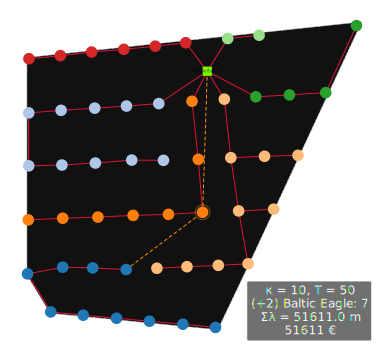

In [4]:
from optiwindnet.api import WindFarmNetwork, EWRouter, HGSRouter, MILPRouter, load_repository
locations = load_repository()
router = MILPRouter(solver_name='ortools', time_limit=20, mip_gap=0.05)
wfn = WindFarmNetwork(L=locations.eagle, cables=10)
wfn.optimize()

L = wfn.L
L.nodes[10]['power'] = 5
L.nodes[10]['label'] = 'A'
#print(L.nodes[10].get('power', 1))
wfn.plot(node_tag='label')
